# (07) clf — mnist

**Motivation**: host = ```chewie```, device = ```cuda:0``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
# sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.utils_model import load_quick
from figures.analysis import plot_convergence
from figures.imgs import plot_weights

device_idx = 0
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:0  ———  host: chewie

## Poisson

Gold standard

In [3]:
which = 'mlp'

paste here:


In [4]:
if which == 'conv':
    model_name = 'poisson_uniform_c(-2)_MNIST_t-16_z-[128]_k-32_<jacob|conv+b>'
    fit_name = 'mc_b256-ep600-lr(0.002)_beta(4:0x0.5)_temp(0.05:lin-0.5)_gr(1000)_(2024_09_06,00:50)'

elif which == 'mlp':
    model_name = 'poisson_uniform_c(-2)_MNIST_t-10_z-[128]_k-32_<jacob|mlp+b>'
    fit_name = 'FINAL_b200-ep500-lr(0.002)_beta(5:0x0.5)_temp(0.05:lin-0.5)_gr(1000)_(2024_09_06,19:15)'

elif which == 'lin':
    model_name = ''
    fit_name = ''

tr, meta = load_model(model_name=model_name, fit_name=fit_name, device=device, checkpoint=-1)
meta['checkpoint']

500

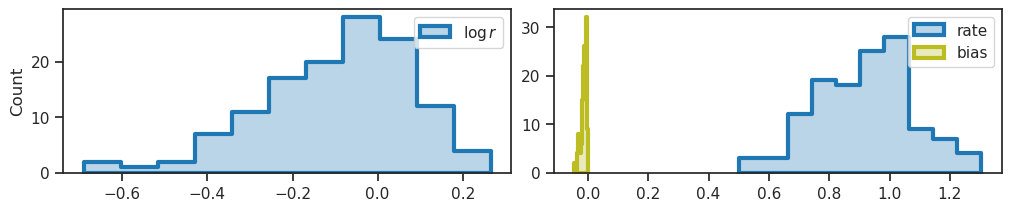

In [5]:
log_rate = tonp(tr.model.layer.log_rate).ravel()
bias = tonp(tr.model.layer.bias).ravel()

fig, axes = create_figure(1, 2, (10, 2))
kws = dict(fill=True, lw=3, alpha=0.3, ax=axes[0])
sns.histplot(log_rate, color='C0', element='step', label=r'$\log r$', **kws)

kws = dict(fill=True, lw=3, alpha=0.3, ax=axes[1])
sns.histplot(np.exp(log_rate), color='C0', element='step', label='rate', **kws)
sns.histplot(bias, color='C8', element='step', label='bias', **kws)

axes[1].set(ylabel='')
add_legend(axes)

plt.show()

In [6]:
dead = log_rate > 2
dead.sum()

0

In [7]:
%%time

kws = dict(
    seq_total=1000,
    seq_batch_sz=1000,
    n_data_batches=None,
    active=~dead,
    full_data=True,
)
results = {
    name: tr.analysis(dl_name=name, **kws)
    for name in ['vld', 'trn']
}

100%|███████████████████████████████| 300/300 [09:01<00:00,  1.81s/it]


CPU times: user 10min 35s, sys: 13.8 s, total: 10min 49s
Wall time: 10min 36s


______________________________________________________________________________________________________________

--------------------------------------------------------------------------------------------------------------

vld

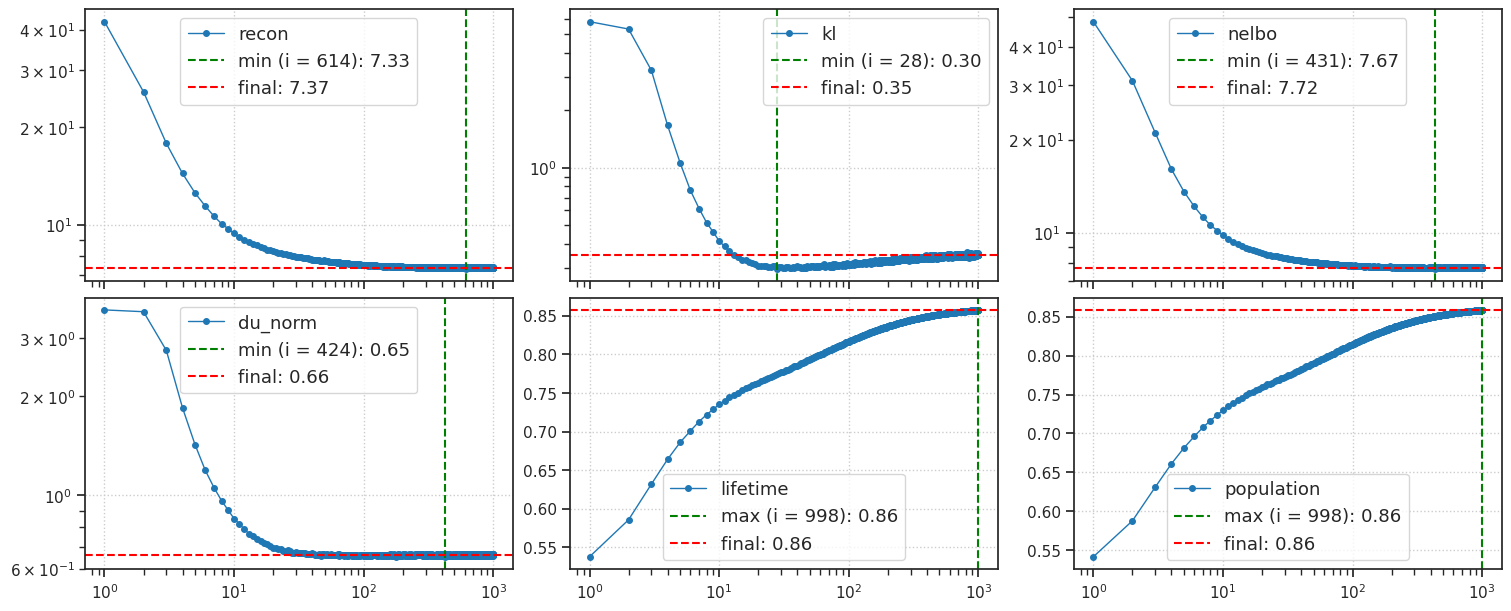

______________________________________________________________________________________________________________

--------------------------------------------------------------------------------------------------------------

trn

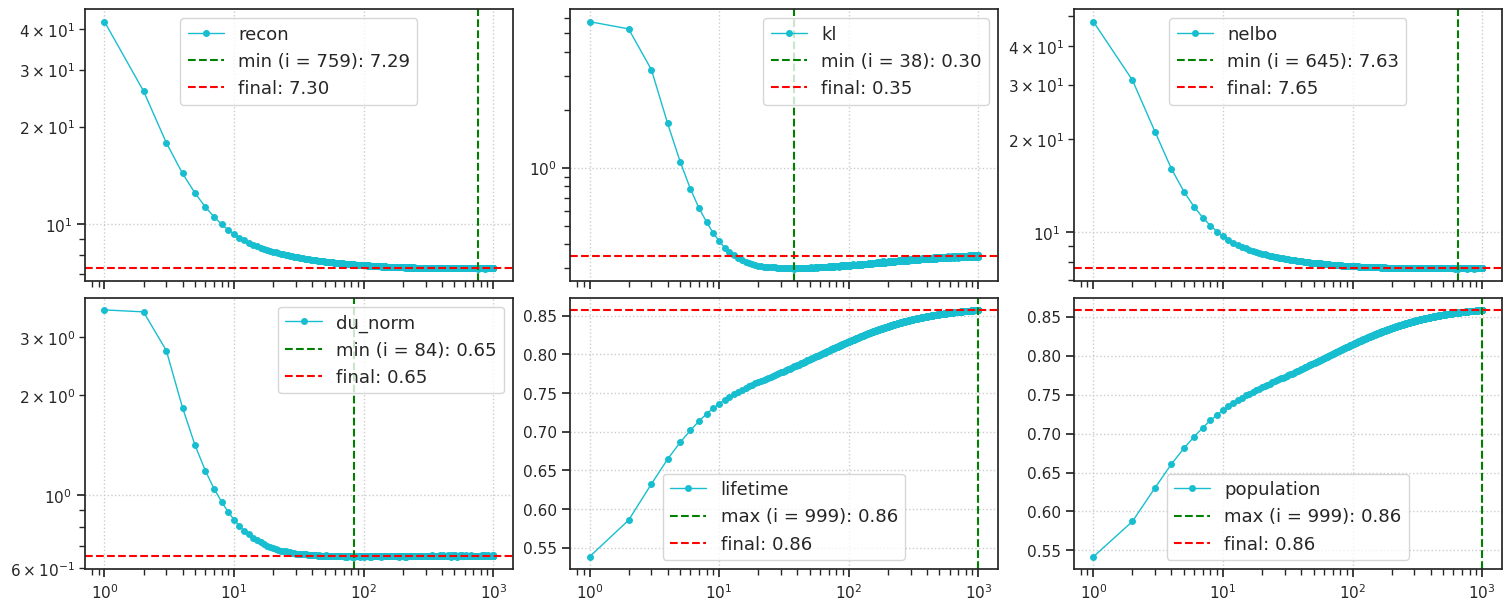

In [8]:
colors = {'trn': 'C9', 'vld': 'C0', 'tst': 'k'}
for name, d in results.items():
    if name != 'trn':
        print('\n\n\n')
    print('_' * 110)
    print('-' * 110)
    print(name)

    plot_convergence(d, color=colors[name])

### clf

In [54]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [63]:
def repres(d):
    return np.exp(d['state_final'])

In [64]:
clf = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    C=0.01,
)
clf.fit(
    X=repres(results['trn']),
    y=results['trn']['g'].astype(int),
)
pred = clf.predict(repres(results['vld']))
report = classification_report(
    y_true=results['vld']['g'].astype(int),
    y_pred=pred,
    output_dict=True,
)
print(report['accuracy'])

0.9417

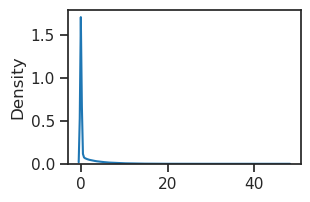

In [61]:
ax = sns.kdeplot(repres(results['vld']).ravel())
ax.set(xscale='linear', yscale='linear')
plt.show()

In [98]:
%%time

kws = dict(
    seq_total=tr.model.cfg.seq_len,
    n_data_batches=None,
    active=~dead,
    full_data=True,
)
results_short = {
    name: tr.analysis(dl_name=name, **kws)
    for name in ['vld', 'trn']
}

100%|███████████████████████████████| 300/300 [00:05<00:00, 53.04it/s]


CPU times: user 16.6 s, sys: 275 ms, total: 16.8 s
Wall time: 6.75 s


In [99]:
def repres(d):
    return np.exp(d['state_final'])

In [100]:
clf = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    C=0.1,
)
clf.fit(
    X=repres(results_short['trn']),
    y=results_short['trn']['g'].astype(int),
)
pred = clf.predict(repres(results_short['vld']))
report = classification_report(
    y_true=results_short['vld']['g'].astype(int),
    y_pred=pred,
    output_dict=True,
)
print(report['accuracy'])

0.9595

## Gaussian

In [3]:
which = 'mlp'

paste here:


In [4]:
if which == 'conv':
    model_name = ''
    fit_name = ''

elif which == 'mlp':
    model_name = 'gaussian_MNIST_t-64_z-[128]_k-32_<jacob|mlp+b>'
    fit_name = 'b200-ep500-lr(0.002)_beta(16:0x0.5)_gr(1000)_(2024_09_06,22:34)'

elif which == 'lin':
    model_name = ''
    fit_name = ''

tr, meta = load_model(model_name=model_name, fit_name=fit_name, device=device, checkpoint=-1)
meta['checkpoint']

500

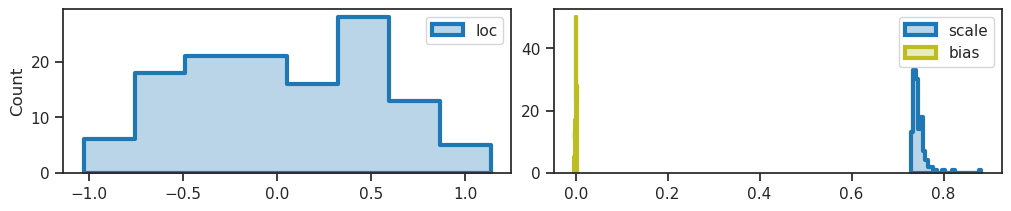

In [6]:
loc = tonp(tr.model.layer.loc).ravel()
log_scale = tonp(tr.model.layer.log_scale).ravel()
bias = tonp(tr.model.layer.bias).ravel()

fig, axes = create_figure(1, 2, (10, 2))
kws = dict(fill=True, lw=3, alpha=0.3, ax=axes[0])
sns.histplot(loc, color='C0', element='step', label='loc', **kws)

kws = dict(fill=True, lw=3, alpha=0.3, ax=axes[1])
sns.histplot(np.exp(log_scale), color='C0', element='step', label='scale', **kws)
sns.histplot(bias, color='C8', element='step', label='bias', **kws)

axes[1].set(ylabel='')
add_legend(axes)

plt.show()

In [7]:
dead = np.exp(log_scale) > 2
dead.sum()

0

In [8]:
%%time

kws = dict(
    seq_total=10000,
    seq_batch_sz=1000,
    n_data_batches=3,
    active=~dead,
    full_data=True,
)
results = {
    name: tr.analysis(dl_name=name, **kws)
    for name in ['vld', 'trn']
}

100%|███████████████████████████████████| 3/3 [00:51<00:00, 17.02s/it]


CPU times: user 1min 55s, sys: 3.57 s, total: 1min 59s
Wall time: 1min 52s


______________________________________________________________________________________________________________

--------------------------------------------------------------------------------------------------------------

vld

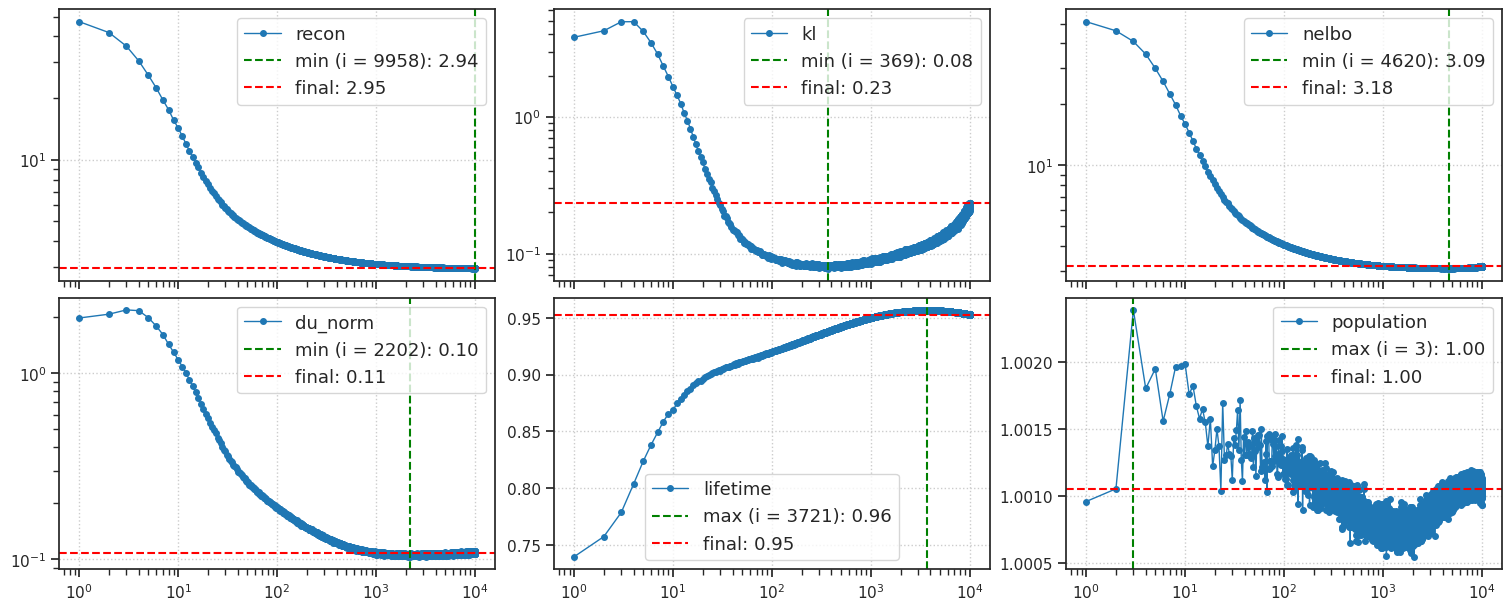

______________________________________________________________________________________________________________

--------------------------------------------------------------------------------------------------------------

trn

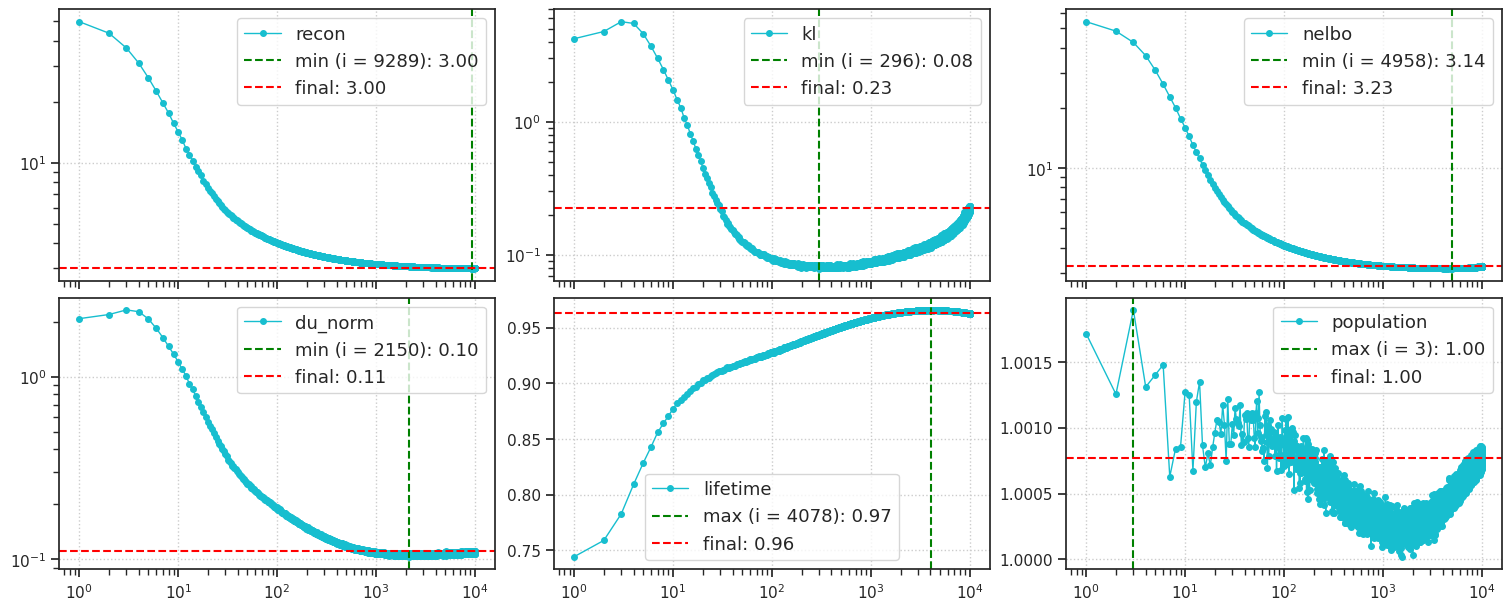

In [9]:
colors = {'trn': 'C9', 'vld': 'C0', 'tst': 'k'}
for name, d in results.items():
    if name != 'trn':
        print('\n\n\n')
    print('_' * 110)
    print('-' * 110)
    print(name)

    plot_convergence(d, color=colors[name])

### clf

In [10]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [15]:
def repres(d):
    x = d['state_final']
    k = x.shape[1] // 2
    mu = x[:, :k]
    log_sigma = x[:, k:]
    return mu

In [16]:
clf = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    C=0.01,
)
clf.fit(
    X=repres(results['trn']),
    y=results['trn']['g'].astype(int),
)
pred = clf.predict(repres(results['vld']))
report = classification_report(
    y_true=results['vld']['g'].astype(int),
    y_pred=pred,
    output_dict=True,
)
print(report['accuracy'])

0.7375

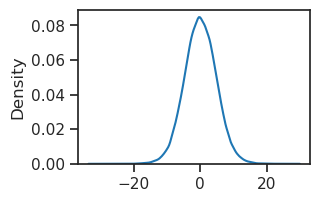

In [17]:
ax = sns.kdeplot(repres(results['vld']).ravel())
ax.set(xscale='linear', yscale='linear')
plt.show()

In [18]:
%%time

kws = dict(
    seq_total=tr.model.cfg.seq_len,
    n_data_batches=None,
    active=~dead,
    full_data=True,
)
results_short = {
    name: tr.analysis(dl_name=name, **kws)
    for name in ['vld', 'trn']
}

100%|███████████████████████████████| 300/300 [00:33<00:00,  9.07it/s]


CPU times: user 51.3 s, sys: 864 ms, total: 52.2 s
Wall time: 39.4 s


In [62]:
def repres(d):
    x = d['state_final']
    k = x.shape[1] // 2
    mu = x[:, :k]
    log_sigma = x[:, k:]
    return x

In [46]:
clf = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    C=0.1,
)
clf.fit(
    X=repres(results_short['trn']),
    y=results_short['trn']['g'].astype(int),
)
pred = clf.predict(repres(results_short['vld']))
report = classification_report(
    y_true=results_short['vld']['g'].astype(int),
    y_pred=pred,
    output_dict=True,
)
print(report['accuracy'])

0.9365

In [100]:
## Was: poisson

0.9595

In [59]:
x = results_short['vld']['state_final']
split_dim = x.shape[1] // 2

mu = x[:, :split_dim]
log_sigma = x[:, split_dim:]

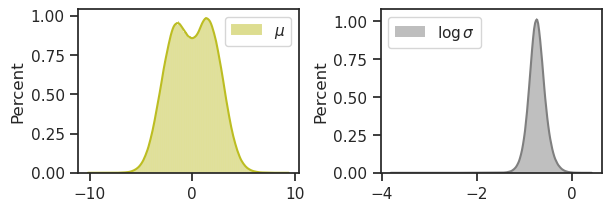

In [60]:
fig, axes = create_figure(1, 2)
sns.histplot(mu.ravel(), stat='percent', kde=True, color='C8', label=r"$\mu$", ax=axes[0])
sns.histplot(log_sigma.ravel(), stat='percent', kde=True, color='C7', label=r"$\log \sigma$", ax=axes[1])
add_legend(axes)
plt.show()

In [69]:
from sklearn.decomposition import PCA

In [74]:
pc_mu = PCA(svd_solver='full').fit(results_short['trn']['state_final'][:, :128])

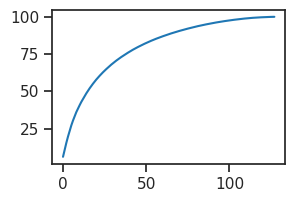

In [77]:
plt.plot(np.cumsum(pc_mu.explained_variance_ratio_ * 100))

In [65]:
results_short['trn']['state_final'].shape

(60000, 256)

In [67]:
uu, ss, vv = sp_lin.svd(
    a=results_short['trn']['state_final'],
    full_matrices=True,
)